In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
df = pd.read_csv('Newcsv.csv')
df.head()

,Mutation_ID,Mut_rate,REVEL,BayesDel,Morphology,AAchange_ID,h1433snWT,AIP1nWT,NOXAnWT,P53R2nWT
0,2159,0.114,0.897,0.5687,"Squamous cell carcinoma, NOS",194,7.3,5.6,6.8,8.8
1,11283,0.114,0.897,0.5687,"Adenocarcinoma, NOS",194,7.3,5.6,6.8,8.8
2,22432,0.114,0.897,0.5687,"Squamous cell carcinoma, NOS",194,7.3,5.6,6.8,8.8
3,10678,0.042,0.808,0.4976,"Large cell carcinoma, NOS",192,11.9,12.4,20.2,14.1
4,9984,0.059,0.607,0.0391,Non-small cell carcinoma (C34._),2706,67.9,67.3,135.7,106.0


In [ ]:
df['Morphology'].unique()

df.isnull().values.any()


False

In [ ]:
df['Morphology'] = df['Morphology'].map({'Squamous cell carcinoma, NOS' :0, 'Adenocarcinoma, NOS' :1, 'Large cell carcinoma, NOS' :2, 'Non-small cell carcinoma (C34._)' :3,  'Squamous cell carcinoma, metastatic, NOS' :4,
       'Small cell carcinoma, NOS' :5, 'Oat cell carcinoma (C34._)' :6,
       'Adenosquamous carcinoma' :7, 'Pulmonary blastoma (C34._)' :8,
       'Papillary adenocarcinoma, NOS' :9 }).astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:

df.head()

,mut_id,mut_rate,Mut_AA,revel,morpho
0,2159,0.114,0.114,0.897,0
1,11283,0.114,0.114,0.897,1
2,22432,0.114,0.114,0.897,0
3,10678,0.042,0.042,0.808,2
4,9984,0.059,0.106,0.607,3


In [ ]:
plt.close();

In [ ]:
sns.set_style('whitegrid');

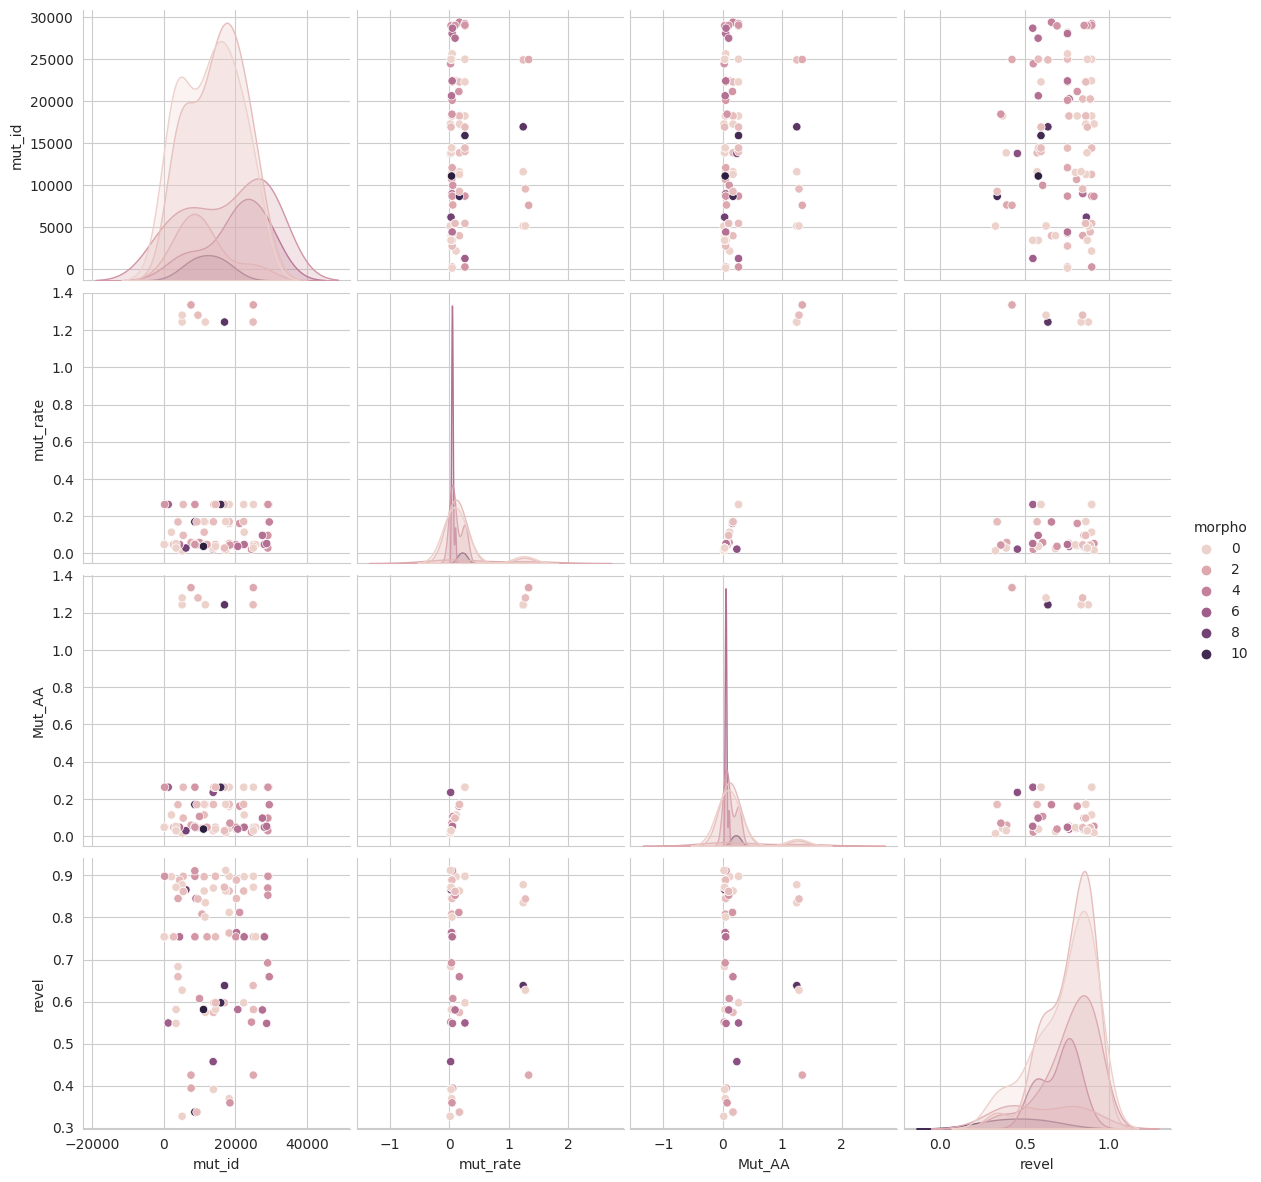

In [ ]:
sns.pairplot(df, hue='morpho', height=3);
plt.show()

In [ ]:
x_data = df.drop(['morpho'],axis=1)
y_data = df['morpho']

In [ ]:
MinMaxScaler = preprocessing.MinMaxScaler()

In [ ]:
X_data_minmax = MinMaxScaler.fit_transform(x_data)
data = pd.DataFrame(X_data_minmax,columns=['mut_id', 'mut_rate', 'mut_AA', 'revel'])
df.head()

,mut_id,mut_rate,Mut_AA,revel,morpho
0,2159,0.114,0.114,0.897,0
1,11283,0.114,0.114,0.897,1
2,22432,0.114,0.114,0.897,0
3,10678,0.042,0.042,0.808,2
4,9984,0.059,0.106,0.607,3


In [1]:
X_train, X_test, y_train, y_test = train_test_split(data, y_data,test_size=0.2, random_state = 1)
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test)

NameError: name 'train_test_split' is not defined

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")

NameError: name 'y_test' is not defined

In [ ]:
print(result)
result1 = classification_report(y_test, ypred)

[[2 1 0 1 0 0]
 [3 3 0 0 0 0]
 [1 0 0 0 0 0]
 [2 1 0 2 0 0]
 [3 0 0 0 0 0]
 [1 0 0 0 0 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.50      0.25         4
           1       0.60      0.50      0.55         6
           2       0.00      0.00      0.00         1
           3       0.67      0.40      0.50         5
           5       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         1

    accuracy                           0.35        20
   macro avg       0.24      0.23      0.22        20
weighted avg       0.38      0.35      0.34        20

Accuracy: 0.35
